# **PREPOCESSING**

In [ ]:
import pandas as pd
import re
import string  # Berisi konstanta string, seperti tanda baca
from nltk.tokenize import word_tokenize  # Tokenisasi teks
from nltk.corpus import stopwords  # Daftar kata-kata berhenti dalam teks

#!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Stemming (penghilangan imbuhan kata) dalam bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Menghapus kata-kata berhenti dalam bahasa Indonesia

from wordcloud import WordCloud  # Membuat visualisasi berbentuk awan kata (word cloud) dari teks

import nltk  # Import pustaka NLTK (Natural Language Toolkit).
nltk.download('punkt')  # Mengunduh dataset yang diperlukan untuk tokenisasi teks.
nltk.download('stopwords')  # Mengunduh dataset yang berisi daftar kata-kata berhenti (stopwords) dalam berbagai bahasa.

#!pip install gdown

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import gdown

# Link yang diperoleh dari Google Drive
file_id = '1IuEPckLLLFCtvvV4Bc3yJmwaHCDMO_Vy'
url = f'https://drive.google.com/uc?id={file_id}'

# Unduh file
output = 'ulasan_aplikasi.csv'
gdown.download(url, output, quiet=False)

# Baca file CSV
df = pd.read_csv(output)
df.head()

Downloading...
From: https://drive.google.com/uc?id=1IuEPckLLLFCtvvV4Bc3yJmwaHCDMO_Vy
To: /content/ulasan_aplikasi.csv
100%|██████████| 928k/928k [00:00<00:00, 65.0MB/s]


,username,rating,review_text,date
0,Pengguna Google,5,perduli ke pelayanan konsumen,2025-06-15 16:53:45
1,Pengguna Google,5,barangnya bagus cuman pengantarannya Tidak tep...,2025-06-15 16:52:09
2,Pengguna Google,5,pelayanannya bagus 💯,2025-06-15 16:50:51
3,Pengguna Google,5,bagus👍👍,2025-06-15 16:50:07
4,Pengguna Google,5,memuaskan,2025-06-15 16:47:32


In [ ]:
# Menyisakan hanya kolom 'review_text'
df = df[['review_text']]

# Mengganti nama kolom menjadi 'content'
df.rename(columns={'review_text': 'content'}, inplace=True)

# Menampilkan hasil
df.head()

,content
0,perduli ke pelayanan konsumen
1,barangnya bagus cuman pengantarannya Tidak tep...
2,pelayanannya bagus 💯
3,bagus👍👍
4,memuaskan


In [ ]:
df.dropna(inplace=True)
clean_df = df
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  10000 non-null  object
dtypes: object(1)
memory usage: 78.3+ KB


In [ ]:
# preprocesing text
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # menghapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # menghapus hashtag
    text = re.sub(r'RT[\s]', '', text) # menghapus RT
    text = re.sub(r"http\S+", '', text) # menghapus link
    text = re.sub(r'[0-9]+', '', text) # menghapus angka
    text = re.sub(r'[^\w\s]', '', text) # menghapus karakter selain huruf dan angka

    text = text.replace('\n', ' ') # mengganti baris baru dengan spasi
    text = text.translate(str.maketrans('', '', string.punctuation)) # menghapus semua tanda baca
    text = text.strip(' ') # menghapus karakter spasi dari kiri dan kanan teks
    return text

def casefoldingText(text): # Mengubah semua karakter dalam teks menjadi huruf kecil
    text = text.lower()
    return text

def tokenizingText(text): # Memecah atau membagi string, teks menjadi daftar token
    text = word_tokenize(text)
    return text

def filteringText(text): # Menghapus stopwords dalam teks
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text): # Mengurangi kata ke bentuk dasarnya yang menghilangkan imbuhan awalan dan akhiran atau ke akar kata
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in text]

    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

def toSentence(list_words): # Mengubah daftar kata menjadi kalimat
    sentence = ' '.join(word for word in list_words)
    return sentence

In [ ]:
import requests

# Fungsi untuk mengunduh dan memproses slang words
def download_slangwords(url):
    response = requests.get(url)
    response.raise_for_status()  # Akan menimbulkan exception jika ada error dalam permintaan
    lines = response.text.splitlines()
    slang_dict = {}
    for line in lines:
        # Asumsikan format file adalah 'slang_word replacement_word'
        parts = line.split()
        if len(parts) == 2:
            slang_dict[parts[0].lower()] = parts[1]
    return slang_dict

# URL dari file slang words
url = 'https://raw.githubusercontent.com/louisowen6/NLP_bahasa_resources/master/combined_slang_words.txt'

# Mengunduh dan memproses slang words
slangwords = download_slangwords(url)

def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [ ]:
import nltk
nltk.download('punkt_tab')
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

clean_df

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,content,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,perduli ke pelayanan konsumen,perduli ke pelayanan konsumen,perduli ke pelayanan konsumen,perduli ke pelayanan konsumen,"[perduli, ke, pelayanan, konsumen]","[perduli, pelayanan, konsumen]",perduli pelayanan konsumen
1,barangnya bagus cuman pengantarannya Tidak tep...,barangnya bagus cuman pengantarannya Tidak tep...,barangnya bagus cuman pengantarannya tidak tep...,barangnya bagus cuman pengantarannya tidak tep...,"[barangnya, bagus, cuman, pengantarannya, tida...","[barangnya, bagus, cuman, pengantarannya]",barangnya bagus cuman pengantarannya
2,pelayanannya bagus 💯,pelayanannya bagus,pelayanannya bagus,pelayanannya bagus,"[pelayanannya, bagus]","[pelayanannya, bagus]",pelayanannya bagus
3,bagus👍👍,bagus,bagus,bagus,[bagus],[bagus],bagus
4,memuaskan,memuaskan,memuaskan,memuaskan,[memuaskan],[memuaskan],memuaskan
...,...,...,...,...,...,...,...
9995,PAKET TIDAK SAMPAI KERUMAH!!! BUKAN SEKALI DUA...,PAKET TIDAK SAMPAI KERUMAH BUKAN SEKALI DUA KA...,paket tidak sampai kerumah bukan sekali dua ka...,paket tidak sampai kerumah bukan sekali dua ka...,"[paket, tidak, sampai, kerumah, bukan, sekali,...","[paket, kerumah, kali, foto, foto, rumah, moho...",paket kerumah kali foto foto rumah mohon menun...
9996,shopee sangat bermanfaat hrg terjangkau,shopee sangat bermanfaat hrg terjangkau,shopee sangat bermanfaat hrg terjangkau,shopee sangat bermanfaat hrg terjangkau,"[shopee, sangat, bermanfaat, hrg, terjangkau]","[shopee, bermanfaat, hrg, terjangkau]",shopee bermanfaat hrg terjangkau
9997,bagus nuhun,bagus nuhun,bagus nuhun,bagus nuhun,"[bagus, nuhun]","[bagus, nuhun]",bagus nuhun
9998,bagus,bagus,bagus,bagus,[bagus],[bagus],bagus


In [ ]:
import csv
import requests
from io import StringIO

# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_positive[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")

# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")

In [ ]:
# Fungsi untuk menentukan polaritas sentimen

def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:

    score = 0
    # Inisialisasi skor sentimen ke 0

    for word in text:
        # Mengulangi setiap kata dalam teks

        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
            # Jika kata ada dalam kamus positif, tambahkan skornya ke skor sentimen

    for word in text:
        # Mengulangi setiap kata dalam teks (sekali lagi)

        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
            # Jika kata ada dalam kamus negatif, kurangkan skornya dari skor sentimen

    polarity=''
    # Inisialisasi variabel polaritas

    if score > 0:
        polarity = 'positive'
        # Jika skor sentimen lebih besar dari 0, maka polaritas adalah positif
    elif score < 0:
        polarity = 'negative'
        # Jika skor sentimen kurang dari 0, maka polaritas adalah negatif
    else:
        polarity = 'neutral'
    # Jika skor sentimen tepat 0, maka polaritas adalah netral

    # Ini adalah bagian yang bisa digunakan untuk menentukan polaritas netral jika diperlukan

    return score, polarity
    # Mengembalikan skor sentimen dan polaritas teks

In [ ]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
positive    4863
negative    2846
neutral     2291
Name: count, dtype: int64


<Axes: title={'center': 'Distribusi Label Sentimen (InSet Lexicon)'}, xlabel='Label', ylabel='Jumlah'>

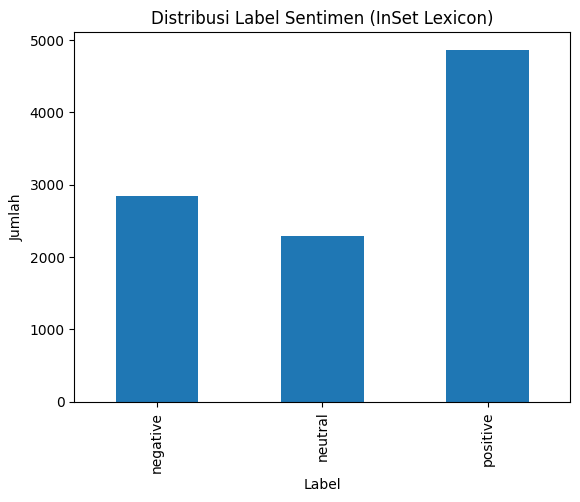

In [ ]:
df['polarity'].value_counts().sort_index().plot(kind='bar', title='Distribusi Label Sentimen (InSet Lexicon)', xlabel='Label', ylabel='Jumlah')

In [ ]:
# Rename kolom sesuai permintaan
clean_df = clean_df.rename(columns={
    'polarity': 'sentiment_label',
    'polarity_score': 'rating',
    'text_akhir': 'cleaned_text'
})

# Pilih hanya kolom yang diinginkan
clean_df = clean_df[['cleaned_text', 'rating', 'sentiment_label']]


In [ ]:
df = clean_df

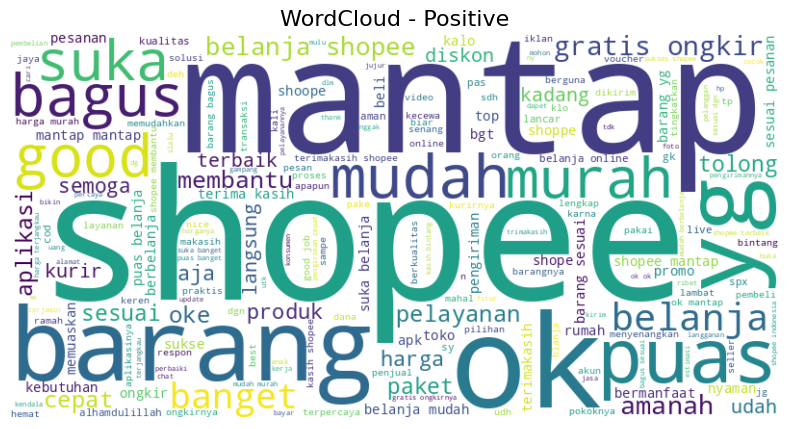

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
# Gabungkan semua teks positif
positive_text = ' '.join(df[df['sentiment_label'] == 'positive']['cleaned_text'])

# Buat dan tampilkan WordCloud
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('WordCloud - Positive', fontsize=16)
plt.axis('off')
plt.show()

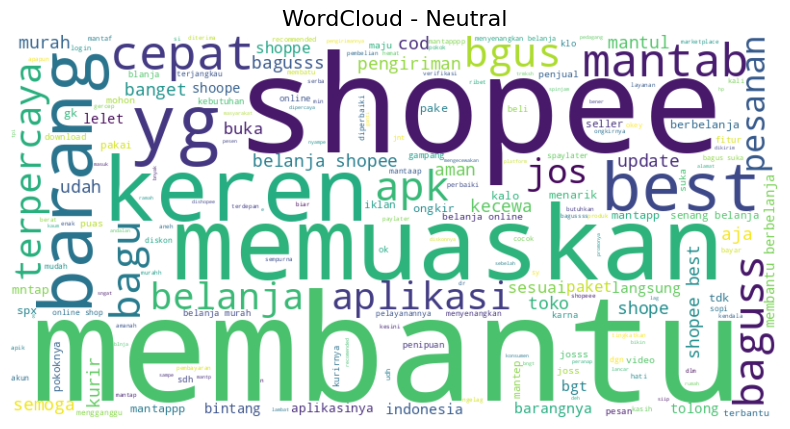

In [ ]:
# Gabungkan semua teks netral
neutral_text = ' '.join(df[df['sentiment_label'] == 'neutral']['cleaned_text'])

# Buat dan tampilkan WordCloud
wordcloud_neutral = WordCloud(width=800, height=400, background_color='white').generate(neutral_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.title('WordCloud - Neutral', fontsize=16)
plt.axis('off')
plt.show()


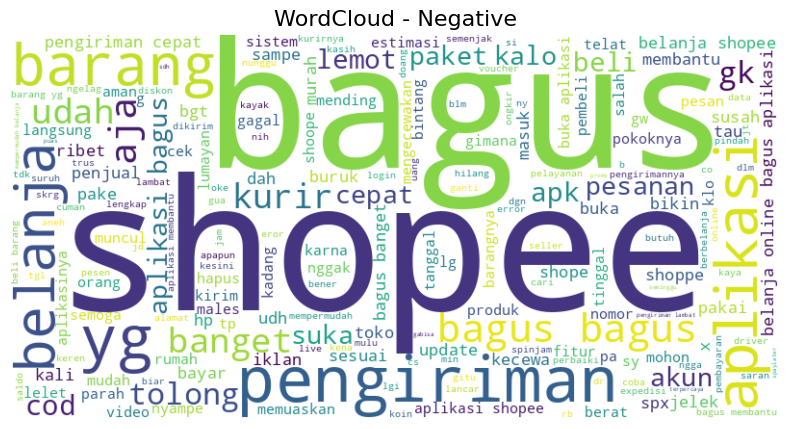

In [ ]:
# Gabungkan semua teks negatif
negative_text = ' '.join(df[df['sentiment_label'] == 'negative']['cleaned_text'])

# Buat dan tampilkan WordCloud
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('WordCloud - Negative', fontsize=16)
plt.axis('off')
plt.show()


In [ ]:
# clean_df.to_csv('cleaned_data.csv', index=False)
# from google.colab import files
# files.download('cleaned_data.csv')

# **MODELING**

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


225/225 ━━━━━━━━━━━━━━━━━━━━ 35s 140ms/step - accuracy: 0.6169 - loss: 0.8265 - val_accuracy: 0.8700 - val_loss: 0.3369
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 41s 140ms/step - accuracy: 0.9266 - loss: 0.2163 - val_accuracy: 0.9150 - val_loss: 0.2575
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 40s 136ms/step - accuracy: 0.9632 - loss: 0.1215 - val_accuracy: 0.9100 - val_loss: 0.2749
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 40s 133ms/step - accuracy: 0.9717 - loss: 0.0873 - val_accuracy: 0.9100 - val_loss: 0.3517
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step


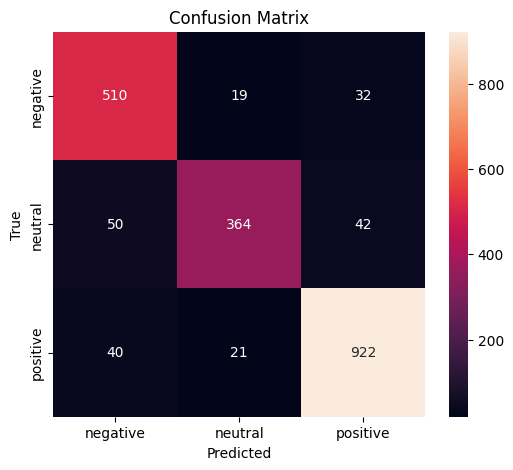

              precision    recall  f1-score   support

    negative       0.85      0.91      0.88       561
     neutral       0.90      0.80      0.85       456
    positive       0.93      0.94      0.93       983

    accuracy                           0.90      2000
   macro avg       0.89      0.88      0.89      2000
weighted avg       0.90      0.90      0.90      2000



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# 1. Load Data
df = clean_df
texts = df['cleaned_text'].astype(str).values
labels = df['sentiment_label'].values

# 2. Encode Labels
le = LabelEncoder()
y = le.fit_transform(labels)
y = to_categorical(y)

# 3. Tokenisasi & Padding
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
max_len = max(len(s) for s in sequences)
X = pad_sequences(sequences, maxlen=max_len)

# 4. Split Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Build Model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=max_len))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(y.shape[1], activation='softmax'))

# 6. Compile & Train (with EarlyStopping)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=10,
    batch_size=32,
    callbacks=[early_stop]
)

# 7. Predict & Evaluate
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

# 8. Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# 9. Classification Report
print(classification_report(y_true, y_pred, target_names=le.classes_))

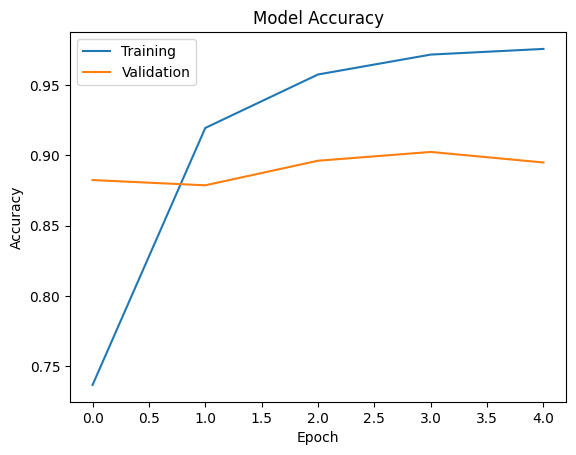

In [ ]:
# 10. Visualisasi Akurasi
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

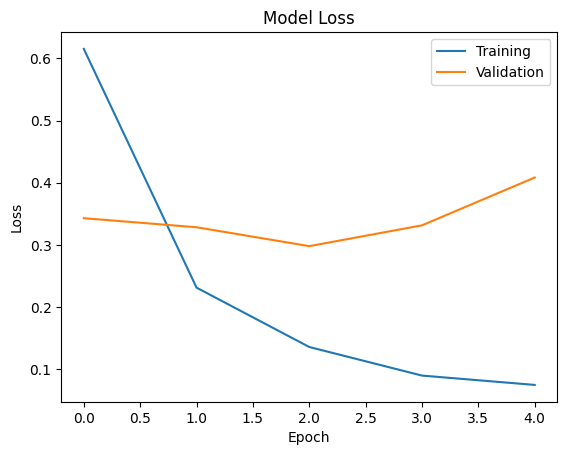

In [ ]:
# 11. Visualisasi Loss
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# **SAVE MODEL**

In [ ]:
model.save("model_sentimen_lstm.h5")
from google.colab import files
files.download("model_sentimen_lstm.h5")

In [ ]:
import pickle

# Save tokenizer
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

# Save label encoder
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)

# Download keduanya
files.download('tokenizer.pkl')
files.download('label_encoder.pkl')
